In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapefile as shp
import geopy.distance as dist
from matplotlib import collections  as mc

trips = pd.read_csv('../data/20210716-19-trips.csv')
shp_path = '../data/Census_Block_Groups_2010/Census_Block_Groups_2010.shp'
sf = shp.Reader(shp_path)

In [7]:
def plot_map(sf, x_lim = None, y_lim = None):
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
#             plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        
def plot_trips(trips):
    color_ = ['red', 'blue']
    for comp in trips.company.unique():
        trip_coords = trips[trips['company']==comp][['lat_start','lat_end','lon_start','lon_end']].to_numpy().reshape(-1,2,2)
        for endpts in trip_coords:
            ax.plot(endpts[1],endpts[0], color=color_[np.where(trips.company.unique()=='comp')])

TypeError: list indices must be integers or slices, not tuple

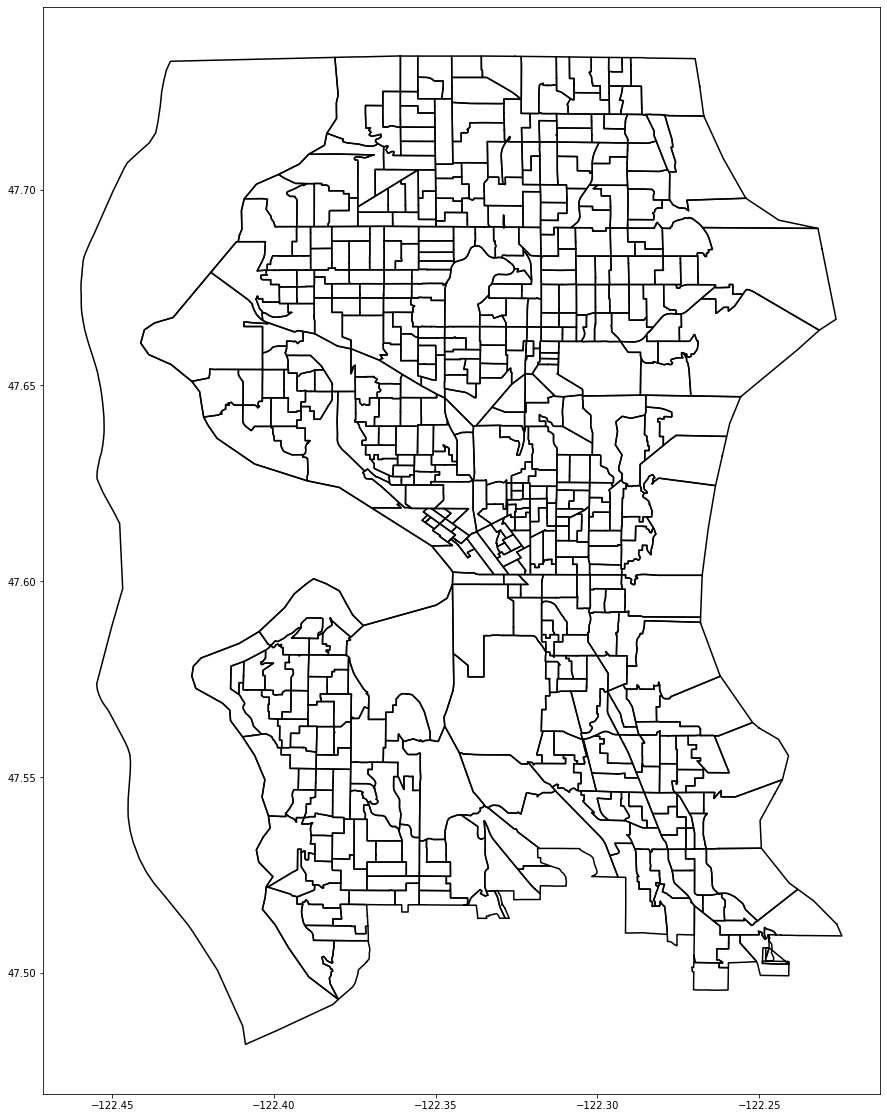

In [8]:
fig, ax = plt.subplots(figsize = (15,20))
plot_map(sf)
plot_trips(trips)

AttributeError: 'numpy.ndarray' object has no attribute 'where'